<h1 style="color:green; text-align:center"> The Winning Effect: An Analysis of the Correlation between MLS Win/Loss Ratios and Attendance Numbers
<h5 style="color:green; text-align:center; font-family: forte"> Name: Curtis Rogers </h5>
<h5 style="color:green; text-align:center; font-family:forte"> Date: 7/16/2024 </h5>


In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



<h5 style="color:blue; text-align:left; font-family:forte"> Section 1: Load MLS Attendance csv </h5>

In [141]:
attendance = pd.read_csv("MLS-Attendance.csv")

attendance.describe()

,StadiumCapacity,TotalSpectators,AverageAttendance,Matches,Capacity %,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,24.094781,269.359414,18.172346,14.675105,0.774646,2012.234177
std,9.494408,132.049413,7.164049,4.112058,0.212460,7.949232
min,17.417000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,20.000000,206.777250,14.541500,15.000000,0.660000,2006.000000
50%,21.000000,260.060500,17.166500,16.000000,0.794500,2014.000000
75%,25.000000,328.681500,20.497750,17.000000,0.911000,2019.000000
max,75.412000,901.033000,53.002000,17.000000,1.617000,2023.000000


<h5 style="color:blue; text-align:left; font-family:forte"> Section 2: Load MLS Regular Season Statistics csv </h5>

In [142]:
stats = pd.read_csv("MLS-Data.csv")

stats.describe()



,GamesPlayed,TotalPoints,TotalWins,TotalLosses,Draws,Goals,GoalsAgainst,GoalsDifferential,PenaltyKickTaken,PenaltyKickConceded,Fouls,FoulsSuffered,Offsides,YellowCards,RedCards,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,32.050633,43.696203,12.312236,12.312236,7.421941,45.962025,45.962025,0.000000,5.244726,5.921941,413.552743,394.808017,75.337553,57.348101,3.687764,2012.234177
std,3.024489,10.666009,3.761322,4.033630,3.663318,10.247190,10.327954,13.880645,2.373930,5.109811,62.942727,60.632284,23.813138,11.530781,2.045874,7.949232
min,18.000000,14.000000,3.000000,4.000000,0.000000,12.000000,20.000000,-44.000000,0.000000,0.000000,201.000000,183.000000,21.000000,30.000000,0.000000,1996.000000
25%,30.000000,37.000000,10.000000,9.250000,5.000000,39.000000,39.000000,-8.000000,4.000000,3.000000,376.250000,362.000000,57.000000,50.000000,2.000000,2006.000000
50%,34.000000,44.000000,12.000000,12.000000,8.000000,45.000000,45.000000,0.500000,5.000000,5.000000,417.000000,394.000000,74.000000,56.000000,3.000000,2014.000000
75%,34.000000,51.000000,15.000000,15.000000,10.000000,52.000000,53.000000,9.750000,7.000000,7.000000,456.000000,428.000000,90.750000,65.000000,5.000000,2019.000000
max,34.000000,73.000000,24.000000,25.000000,18.000000,85.000000,75.000000,48.000000,14.000000,31.000000,618.000000,590.000000,149.000000,92.000000,11.000000,2023.000000


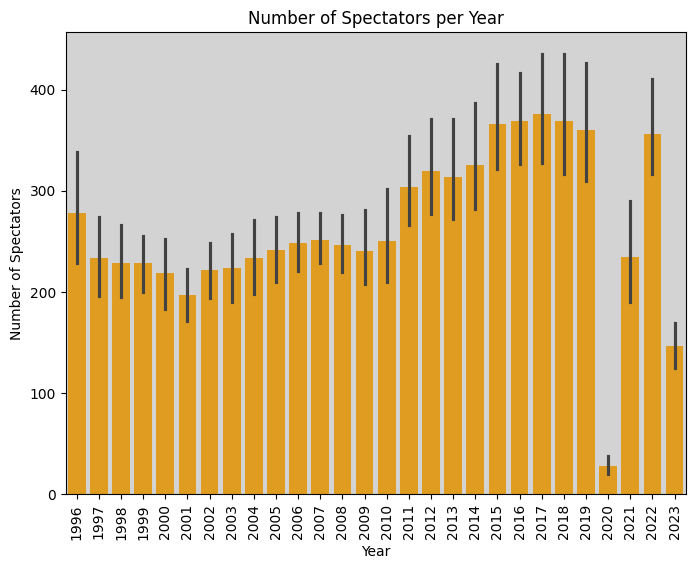

In [143]:
wins1 = stats['TotalWins']
year1 = stats["Year"]
games1 = stats['GamesPlayed']
spectators1= attendance['TotalSpectators']

plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.set_facecolor("lightgray")
sns.barplot(x=year1, y=spectators1, color= 'orange')

plt.title('Number of Spectators per Year')
plt.ylabel('Number of Spectators')
plt.xlabel('Year')
plt.xticks(rotation='vertical')


plt.show()


<h5 style="color:blue; text-align:left; font-family:forte"> Section 3: Merge both Files into on DataFrame </h5>

In [144]:
merged_df = pd.merge(stats, attendance, on=['Club','Year'], how='left')

merged_df.describe()

,GamesPlayed,TotalPoints,TotalWins,TotalLosses,Draws,Goals,GoalsAgainst,GoalsDifferential,PenaltyKickTaken,PenaltyKickConceded,...,FoulsSuffered,Offsides,YellowCards,RedCards,Year,StadiumCapacity,TotalSpectators,AverageAttendance,Matches,Capacity %
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,32.050633,43.696203,12.312236,12.312236,7.421941,45.962025,45.962025,0.000000,5.244726,5.921941,...,394.808017,75.337553,57.348101,3.687764,2012.234177,24.094781,269.359414,18.172346,14.675105,0.774646
std,3.024489,10.666009,3.761322,4.033630,3.663318,10.247190,10.327954,13.880645,2.373930,5.109811,...,60.632284,23.813138,11.530781,2.045874,7.949232,9.494408,132.049413,7.164049,4.112058,0.212460
min,18.000000,14.000000,3.000000,4.000000,0.000000,12.000000,20.000000,-44.000000,0.000000,0.000000,...,183.000000,21.000000,30.000000,0.000000,1996.000000,17.417000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,37.000000,10.000000,9.250000,5.000000,39.000000,39.000000,-8.000000,4.000000,3.000000,...,362.000000,57.000000,50.000000,2.000000,2006.000000,20.000000,206.777250,14.541500,15.000000,0.660000
50%,34.000000,44.000000,12.000000,12.000000,8.000000,45.000000,45.000000,0.500000,5.000000,5.000000,...,394.000000,74.000000,56.000000,3.000000,2014.000000,21.000000,260.060500,17.166500,16.000000,0.794500
75%,34.000000,51.000000,15.000000,15.000000,10.000000,52.000000,53.000000,9.750000,7.000000,7.000000,...,428.000000,90.750000,65.000000,5.000000,2019.000000,25.000000,328.681500,20.497750,17.000000,0.911000
max,34.000000,73.000000,24.000000,25.000000,18.000000,85.000000,75.000000,48.000000,14.000000,31.000000,...,590.000000,149.000000,92.000000,11.000000,2023.000000,75.412000,901.033000,53.002000,17.000000,1.617000


<h5 style="color:blue; text-align:left; font-family:forte"> Section 4: DataFrame Transformations </h5>
<p style="color:orange; text-align:left; font-family:Comic Sans Ms;font-size:11px"> For this project a few transformations were completed to prepare the dataset for analysis. 
<ul style="color:orange; text-align:left; font-family:Comic Sans Ms;font-size:11px">
    <li>Add TotalWins column</li>
    <li>Changed "Club" column to a "string datatype</li>
    <li>Removed Data From 2020</li>
</ul>
</p>

In [145]:
merged_df['Win/lossRatio'] = merged_df['TotalWins'] / merged_df['TotalLosses']
merged_df['Club'] = merged_df['Club'].astype("string")

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Club                 474 non-null    string 
 1   GamesPlayed          474 non-null    int64  
 2   TotalPoints          474 non-null    int64  
 3   TotalWins            474 non-null    int64  
 4   TotalLosses          474 non-null    int64  
 5   Draws                474 non-null    int64  
 6   Goals                474 non-null    int64  
 7   GoalsAgainst         474 non-null    int64  
 8   GoalsDifferential    474 non-null    int64  
 9   PenaltyKickTaken     474 non-null    int64  
 10  PenaltyKickConceded  474 non-null    int64  
 11  Fouls                474 non-null    int64  
 12  FoulsSuffered        474 non-null    int64  
 13  Offsides             474 non-null    int64  
 14  YellowCards          474 non-null    int64  
 15  RedCards             474 non-null    int

In [146]:
merged_df = merged_df[merged_df.Year != 2020]

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 0 to 473
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Club                 448 non-null    string 
 1   GamesPlayed          448 non-null    int64  
 2   TotalPoints          448 non-null    int64  
 3   TotalWins            448 non-null    int64  
 4   TotalLosses          448 non-null    int64  
 5   Draws                448 non-null    int64  
 6   Goals                448 non-null    int64  
 7   GoalsAgainst         448 non-null    int64  
 8   GoalsDifferential    448 non-null    int64  
 9   PenaltyKickTaken     448 non-null    int64  
 10  PenaltyKickConceded  448 non-null    int64  
 11  Fouls                448 non-null    int64  
 12  FoulsSuffered        448 non-null    int64  
 13  Offsides             448 non-null    int64  
 14  YellowCards          448 non-null    int64  
 15  RedCards             448 non-null    int64  


<h5 style="color:blue; text-align:left; font-family:forte"> Section 5: Write the merged DataFrame into a csv file. </h5>

In [147]:
merged_df.to_csv('merged_data.csv', index=False)

<h5 style="color:blue; text-align:left; font-family:forte"> Section 6: Investigation of Variables </h5>

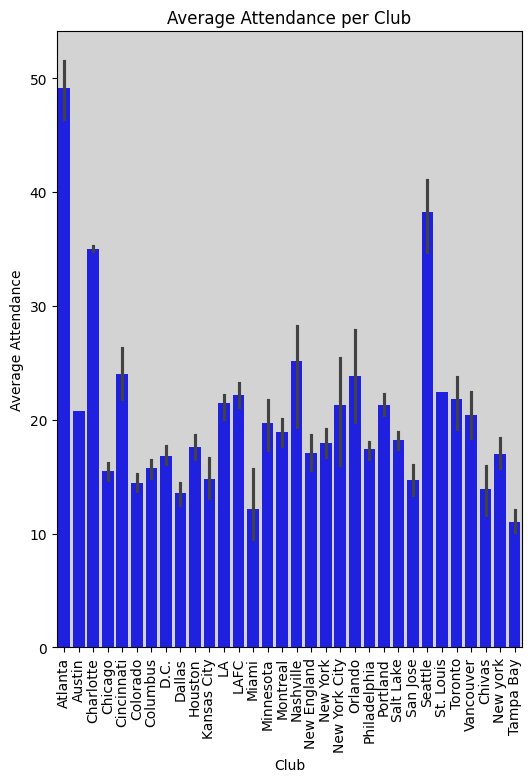

In [148]:
attendance = merged_df['AverageAttendance']
wins = merged_df['TotalWins']
loses =merged_df['TotalLosses']
year = merged_df['Year']
club = merged_df['Club']
ratio = merged_df['Win/lossRatio']


plt.figure(figsize=(6,8))
ax=plt.axes()
ax.set_facecolor("lightgray")
sns.barplot(x=club,y=attendance, color='blue')
plt.title('Average Attendance per Club')
plt.xlabel('Club')
plt.ylabel('Average Attendance')
plt.xticks(rotation='vertical')
plt.show()


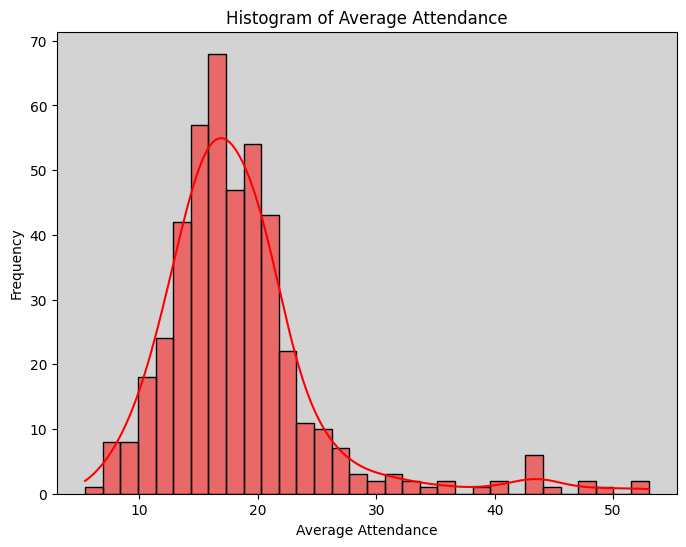

In [149]:
plt.figure(figsize=(8,6))

ax = plt.axes()
ax.set_facecolor("lightgray")

sns.histplot(attendance, kde=True, color='red')
plt.title('Histogram of Average Attendance')
plt.xlabel('Average Attendance')
plt.ylabel("Frequency")
plt.show()

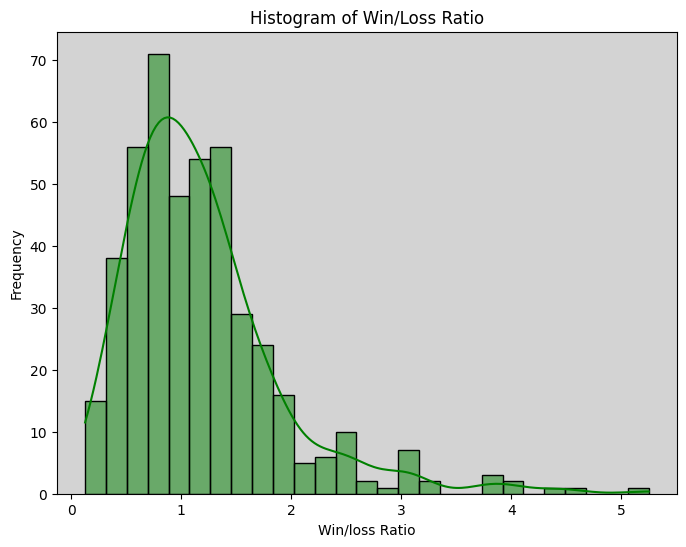

In [150]:
plt.figure(figsize=(8,6))

ax = plt.axes()
ax.set_facecolor("lightgray")

sns.histplot(merged_df["Win/lossRatio"], kde=True, color='green')
plt.title('Histogram of Win/Loss Ratio')
plt.xlabel('Win/loss Ratio')
plt.ylabel("Frequency")
plt.show()

<h5 style="color:blue; text-align:left; font-family:fantasy"> Section 7: Machine Learning, Scatter Plot of variables </h5>

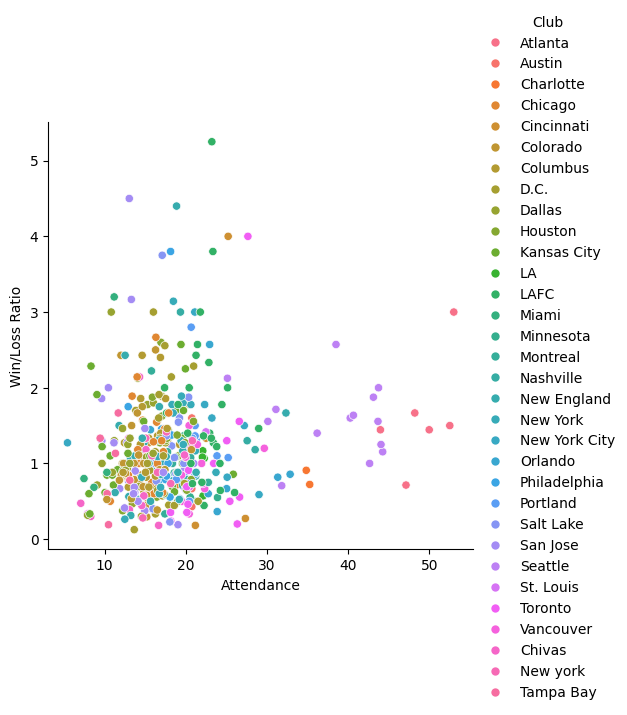

In [151]:
from pandas.plotting import scatter_matrix


colors = ('blue','red')
sns.relplot(x=attendance, y=ratio, hue=club)
plt.xlabel('Attendance')
plt.ylabel('Win/Loss Ratio')

plt.show()

<h5 style="color:blue; text-align:left; font-family:forte"> Section 8: Machine Learning, Divide Data into Test and Train Groups  </h5>

In [152]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(merged_df, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))


Train size:  358 Test size:  90


<h5 style="color:blue; text-align:left; font-family:forte"> Section 9: Machine Learning, Linerar Regression  </h5>

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['AverageAttendance']]
y = train_set['Win/lossRatio']
X_test = test_set[['AverageAttendance']]
y_test = test_set['Win/lossRatio']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print("Name: Curtis Rogers, Environment= Microsoft, Python")
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

print()
print("==============================================================================")

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Name: Curtis Rogers, Environment= Microsoft, Python
Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  0.8860314713797379
 Coefficients [0.01543835]
 Score 0.02411020084689197
MAE is  0.495502992015534
RMSE is  0.695384892133621
MSE is  0.4835601482076877
R^2  0.02411020084689197


Results for linear regression on test data
MAE is  0.5004530055454603
RMSE is  0.7535596729501013
MSE is  0.5678521806966637
R^2  0.01671037765993688


<h5 style="color:blue; text-align:left; font-family:forte"> Section 10: Machine Learning, Plot Linear Regression  </h5>

c:\Users\ctrog\Documents\Data Analytics Masters\Capstone\capstone-project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


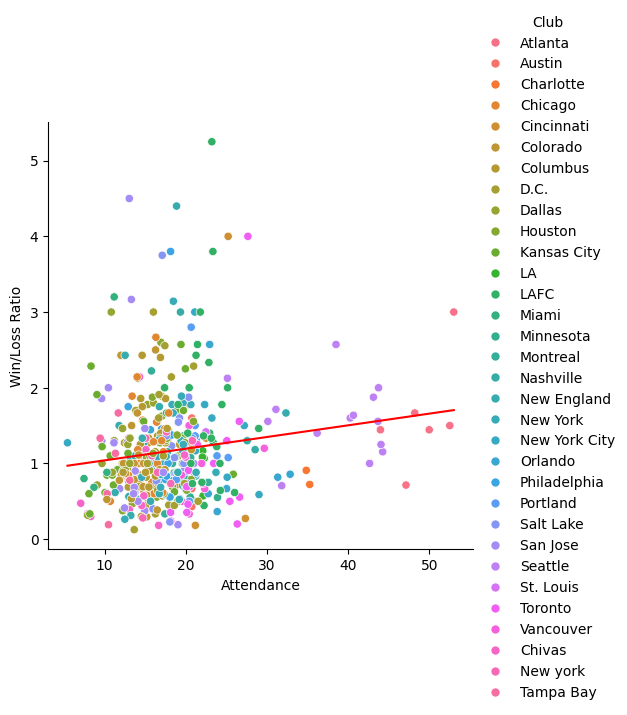

In [154]:
min_attendance = attendance.min()
max_attendance = attendance.max()
points = 200
step_by = (max_attendance - min_attendance)/(points-1)

x_values = [min_attendance + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

colors = ('blue','red')
sns.relplot(x=attendance, y=ratio, hue=club)
plt.xlabel('Attendance')
plt.ylabel('Win/Loss Ratio')
plt.plot(x_values, y_values, c='red')
plt.show()

<h5 style="color:blue; text-align:left; font-family:forte"> Section 11: Machine Learning, Polynomial Regression  </h5> 

In [161]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['AverageAttendance']]
y = train_set['Win/lossRatio']
X_poly = poly_process.fit_transform(X)


X_test = test_set[['AverageAttendance']]
y_test = test_set['Win/lossRatio']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

print()
print("==============================================================================")

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for Polynomial Regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  0.4605779177107092
 Coefficients [ 7.53224125e-02 -2.49659396e-03  3.00043086e-05]
 Score 0.02620602553110607
MAE is  0.495878352184358
RMSE is  0.6946377851617895
MSE is  0.4825216525744765
R^2  0.02620602553110607


Results for Polynomial Regression on test data
MAE is  0.5007080220943723
RMSE is  0.753550524901383
MSE is  0.5678383935791498
R^2  0.01673425135459594


<h5 style="color:blue; text-align:left; font-family:forte"> Section 12: Machine Learning, Plot Polynomial Regression  </h5>

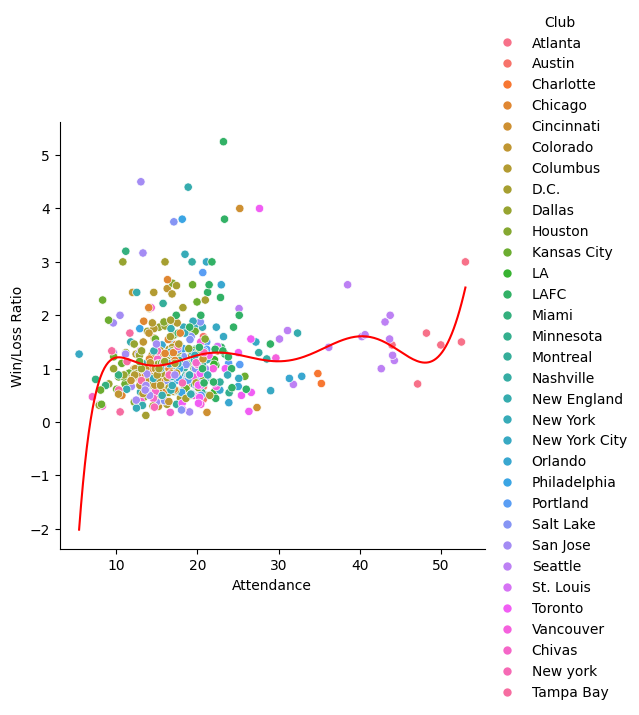

In [156]:

min_attendance = attendance.min()
max_attendance = attendance.max()
points = 200
step_by = (max_attendance - min_attendance)/(points-1)

x_values = [min_attendance + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)

colors = ('blue','red')
sns.relplot(x=attendance, y=ratio, hue=club)
plt.xlabel('Attendance')
plt.ylabel('Win/Loss Ratio')
plt.plot(x_values, y_values, c='red')
plt.show()

# Results
Basic results for our regression models to predict weight on
the MLS data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Attendance|Training|0.695|2.41|
|Linear Regression|Attendance|Test|0.754|1.67|
|Polynomial Regression degree 3|Attendance|Training|0.695|2.62|
|Polynomial Regression degree 3|Attendance|Test|0.754|1.67|
